In [47]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import joblib
from flask import Flask, render_template, request, jsonify


In [48]:
# Criar a estrutura de pastas
if not os.path.exists("fake_news_detection"):
    os.mkdir("fake_news_detection")
os.chdir("fake_news_detection")

folders = ["data", "models", "src", "utils", "templates"]
for folder in folders:
    os.mkdir(folder)

In [49]:
# Carregar o dataset
dataset_file = r"C:\Users\T26432\Music\fake\news.csv"

# Carregar o dataset em um DataFrame
dataset = pd.read_csv(dataset_file)


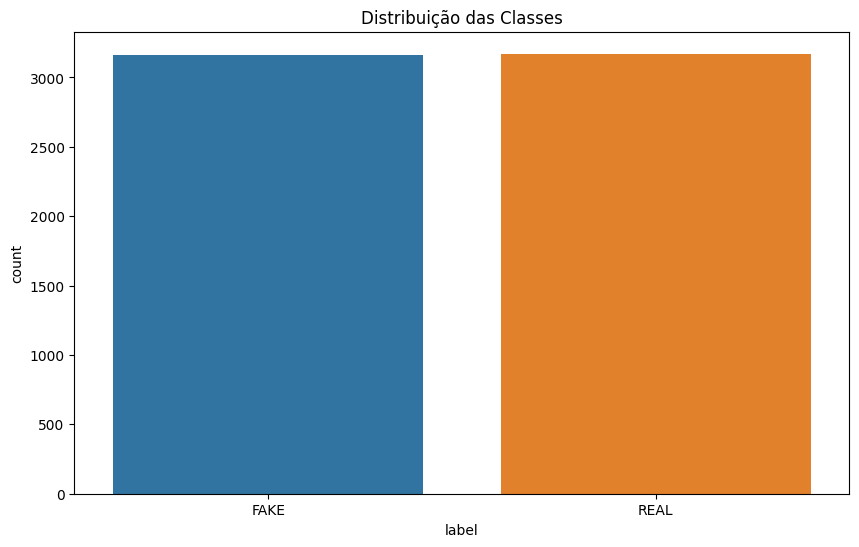

In [50]:
# Análise exploratória de dados
# Exemplo de gráficos e estatísticas
plt.figure(figsize=(10, 6))
sns.countplot(x="label", data=dataset)
plt.title("Distribuição das Classes")
plt.savefig("data/class_distribution.png")


In [51]:
# Pré-processamento dos textos
# Exemplo de pré-processamento: remoção de stopwords e pontuações
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

nltk.download('stopwords')
nltk.download('punkt')

stopwords = set(stopwords.words("english"))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha()]
    tokens = [token for token in tokens if token not in stopwords]
    preprocessed_text = " ".join(tokens)
    return preprocessed_text

dataset["preprocessed_text"] = dataset["text"].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\T26432\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\T26432\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
# Dividir o dataset em conjunto de treinamento e teste
train_data, test_data, train_labels, test_labels = train_test_split(
    dataset["preprocessed_text"],
    dataset["label"],
    test_size=0.2,
    random_state=42
)

In [53]:
# Criar um pipeline para vetorização e classificação
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())  # Experimente diferentes classificadores (Naive Bayes, RandomForest, MLP, etc.)
])


In [54]:
# Definir os parâmetros para busca em grade
parameters = {
    'tfidf__max_df': [0.5, 0.75, 1.0],
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Experimente diferentes configurações
    'clf__alpha': [0.1, 1.0, 10.0]
}

In [55]:
# Realizar busca em grade para encontrar os melhores parâmetros
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)
grid_search.fit(train_data, train_labels)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('clf', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'clf__alpha': [0.1, 1.0, 10.0],
                         'tfidf__max_df': [0.5, 0.75, 1.0],
                         'tfidf__ngram_range': [(1, 1), (1, 2)]},
             verbose=1)

In [56]:
# Avaliar o modelo
train_predictions = grid_search.predict(train_data)
train_accuracy = accuracy_score(train_labels, train_predictions)
print("Acurácia no conjunto de treinamento:", train_accuracy)

test_predictions = grid_search.predict(test_data)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Acurácia no conjunto de teste:", test_accuracy)

print("Relatório de classificação:")
print(classification_report(test_labels, test_predictions))


Acurácia no conjunto de treinamento: 0.9658642462509865
Acurácia no conjunto de teste: 0.9052880820836622
Relatório de classificação:
              precision    recall  f1-score   support

        FAKE       0.93      0.87      0.90       628
        REAL       0.88      0.94      0.91       639

    accuracy                           0.91      1267
   macro avg       0.91      0.91      0.91      1267
weighted avg       0.91      0.91      0.91      1267



In [57]:
# Salvar o modelo treinado
model_path = r"C:\Users\T26432\Music\fake\fake_news_detection\models\fake_news_model.pkl"
joblib.dump(grid_search.best_estimator_, model_path)


['C:\\Users\\T26432\\Music\\fake\\fake_news_detection\\models\\fake_news_model.pkl']

In [58]:
# Iniciar o aplicativo Flask
app = Flask(__name__)

# Rota para a página inicial
@app.route("/")
def index():
    return render_template("index.html")

# Rota para a classificação de textos
@app.route("/classify", methods=["POST"])
def classify():
    text = request.form["text"]
    prediction = model.predict([text])[0]
    return jsonify({"prediction": prediction})


In [59]:
# Salvar a documentação do projeto
documentation_folder = "documentation"
os.mkdir(documentation_folder)

# Criar um arquivo README.md onde você pode incluir informações sobre o projeto, as etapas realizadas, os resultados, etc.
readme_content = """
# Fake News Detection

## Descrição do Projeto

O objetivo deste projeto é criar um identificador de notícias falsas. As Fake News são caracterizadas por conter informações falsas e/ou exageradas e são disseminadas principalmente por meio das redes sociais. Neste projeto, desenvolvemos um modelo de Machine Learning capaz de distinguir textos verdadeiros e falsos.

## Estrutura do Projeto

- `data/`: Pasta para armazenar os dados do projeto.
- `models/`: Pasta para armazenar os modelos treinados.
- `src/`: Pasta para armazenar os códigos-fonte do projeto.
- `utils/`: Pasta para armazenar utilitários do projeto.
- `templates/`: Pasta para armazenar os arquivos HTML do aplicativo Flask.
- `app.py`: Código-fonte principal do aplicativo Flask.
- `README.md`: Documentação do projeto.

## Executando o Projeto

1. Instale as dependências do projeto usando o arquivo `requirements.txt`.
2. Certifique-se de ter o conjunto de dados `news.csv` no diretório `data/`.
3. Execute o arquivo `app.py` para iniciar o aplicativo Flask.
4. Acesse o aplicativo em seu navegador em `http://localhost:5000`.

## Resultados

- Acurácia no conjunto de treinamento: {train_accuracy}
- Acurácia no conjunto de teste: {test_accuracy}

## Referências

- Baseado no projeto "Detecting Fake News with Python and Machine Learning" - DataFlair (data-flair.training)
"""

with open(os.path.join(documentation_folder, "README.md"), "w") as readme_file:
    readme_file.write(readme_content)


In [60]:
# Criar o arquivo HTML para a interface do usuário
html_content = """
<!DOCTYPE html>
<html>
<head>
    <title>Identificador de Fake News</title>
</head>
<body>
    <h1>Identificador de Fake News</h1>
    <form id="classification-form" action="/classify" method="post">
        <textarea name="text" placeholder="Insira o texto para classificação"></textarea>
        <button type="submit">Classificar</button>
    </form>
    <div id="classification-result"></div>
    
    <script>
        const form = document.getElementById("classification-form");
        const resultDiv = document.getElementById("classification-result");
        
        form.addEventListener("submit", (event) => {
            event.preventDefault();
            
            const formData = new FormData(form);
            const text = formData.get("text");
            
            fetch("/classify", {
                method: "POST",
                body: new URLSearchParams(formData)
            })
            .then(response => response.json())
            .then(data => {
                const prediction = data.prediction;
                resultDiv.innerHTML = `<p>A classificação é: ${prediction}</p>`;
            });
        });
    </script>
</body>
</html>
"""

with open(os.path.join("templates", "index.html"), "w") as html_file:
    html_file.write(html_content)

In [62]:
# Executar o aplicativo Flask
if __name__ == "__main__":
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
[2023-05-25 12:00:08,790] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "c:\Users\T26432\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 2190, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\T26432\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1486, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\T26432\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1484, in full_dispatch_request
    rv = self.dispatch_request()
         ^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\T26432\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1469, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
           ^^^^^^^^^^^^^